<a href="https://colab.research.google.com/github/Ali6518856/INSE6220_Project/blob/main/Titanic_Survival_Prediction_PCA_and_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PyCaret
!pip install pycaret

# Run the below code to check the installed version
from pycaret.utils import version
version()

# Install Analysis Extras for Explainable AI
!pip install pycaret[analysis]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.4 MB/s eta 0:00:00
   ━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 90.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.res

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Check basic info and missing values
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  708


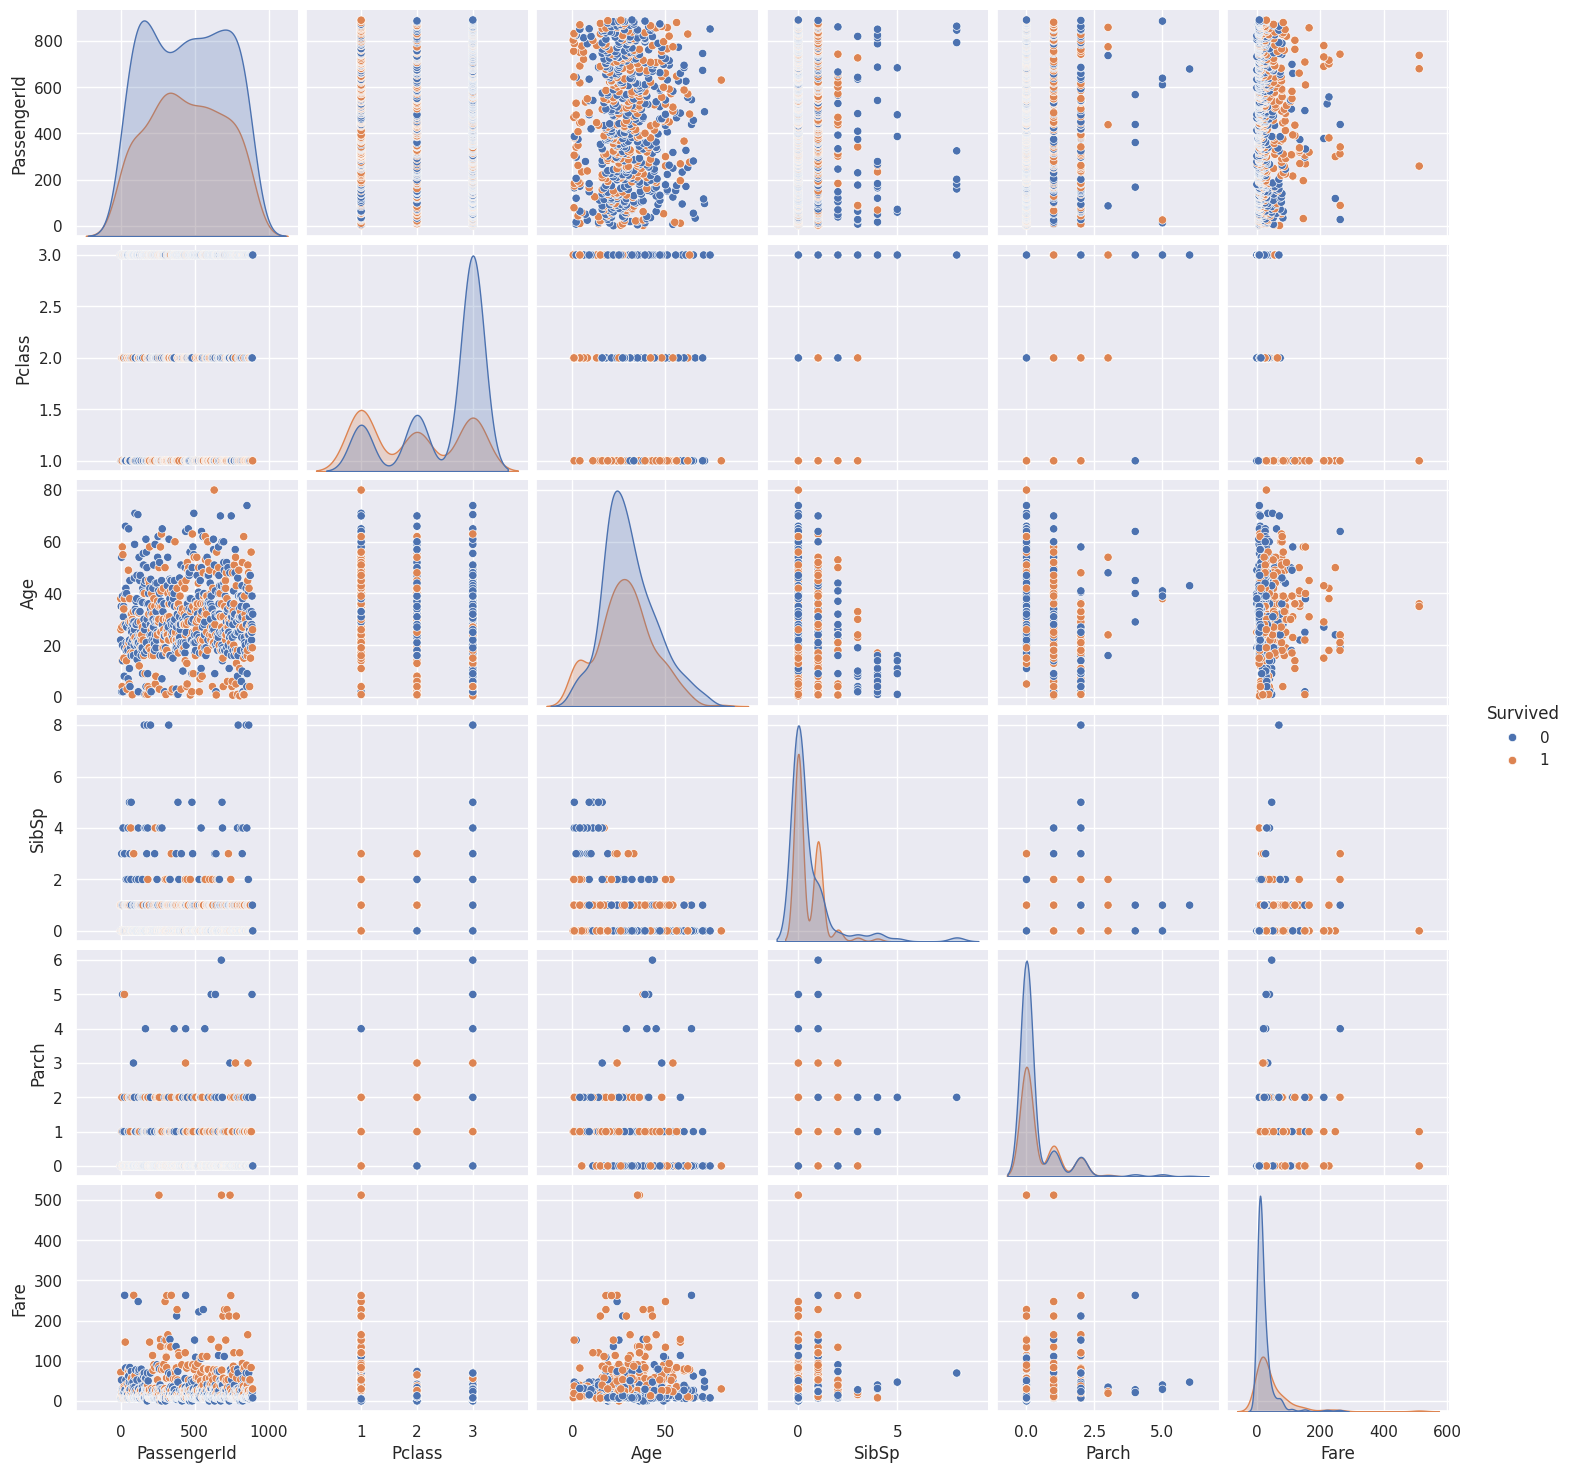

In [5]:
# Exploratory Data Analysis: Visualizing the pairwise relationships
sns.pairplot(df, hue='Survived')  # Survived is the target variable
plt.show()

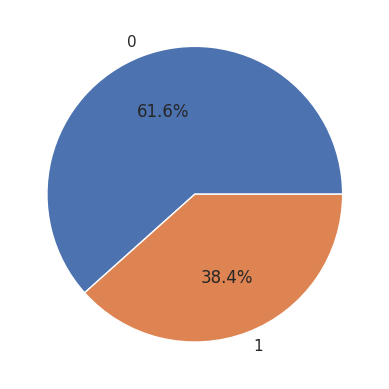

In [6]:
# Visualize the class distribution (Survived vs. Not Survived)
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


In [7]:
# Data Matrix
# Selecting features and target column for analysis
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Dropping non-numeric columns
y = df['Survived']  # Target variable

In [8]:
# Handle missing values (fill missing Age with median)
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with the most common value
X['Fare'].fillna(X['Fare'].median(), inplace=True)

In [9]:
# Convert categorical features into numerical (Embarked, Sex)
X = pd.get_dummies(X, columns=['Embarked', 'Sex'], drop_first=True)

In [10]:
# Describe the features
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:

# Standardizing the features
Xs = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(Xs, columns=X.columns)


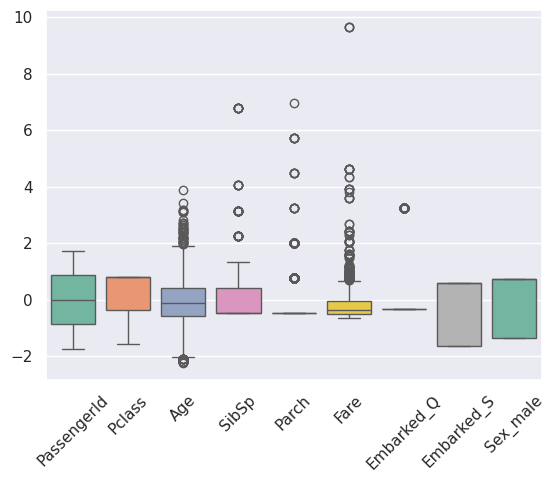

In [12]:
# Box plot for visualizing the feature distributions
sns.boxplot(data=X_scaled, orient="v", palette="Set2")
plt.xticks(rotation=45)
plt.show()

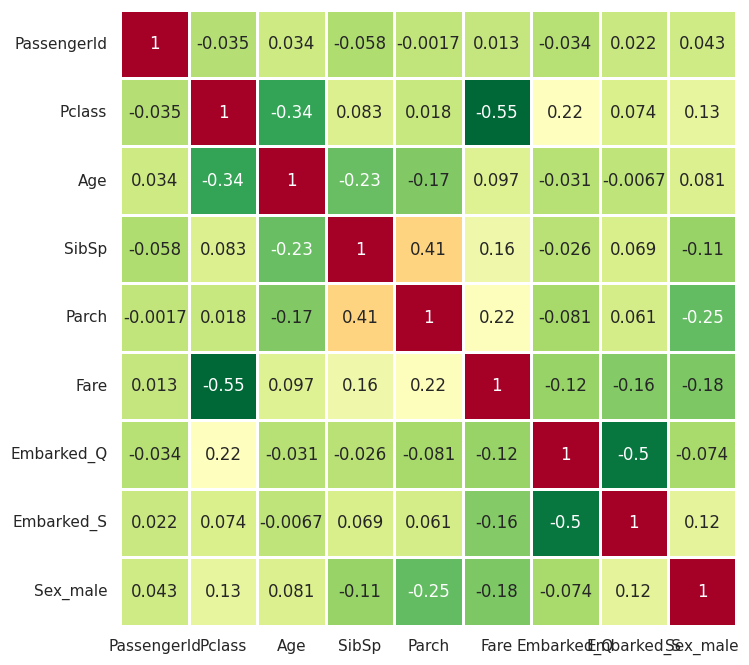

In [13]:
# Set the figure size (e.g., 10x8 inches)
plt.figure(figsize=(10, 8))

# Correlation Matrix
sns.heatmap(X_scaled.corr(), cmap='RdYlGn_r', linewidths=1, annot=True, cbar=False, square=True)

# Adjust tick labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.show()

In [14]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

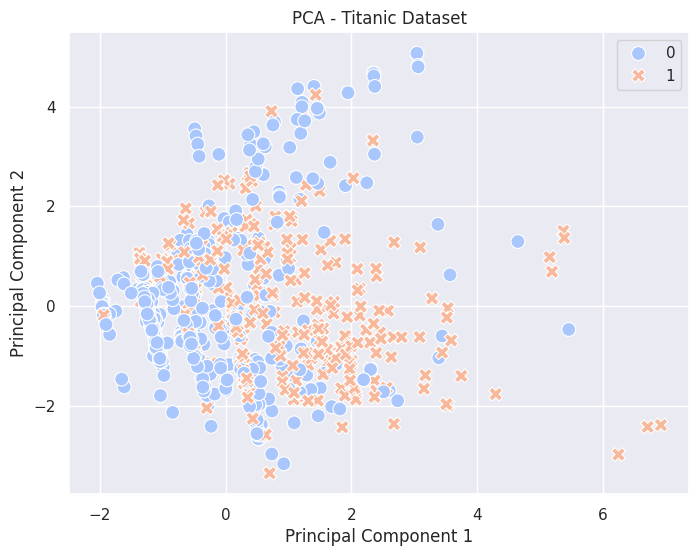

In [15]:
# Plotting the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', style=y, s=100)
plt.title("PCA - Titanic Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

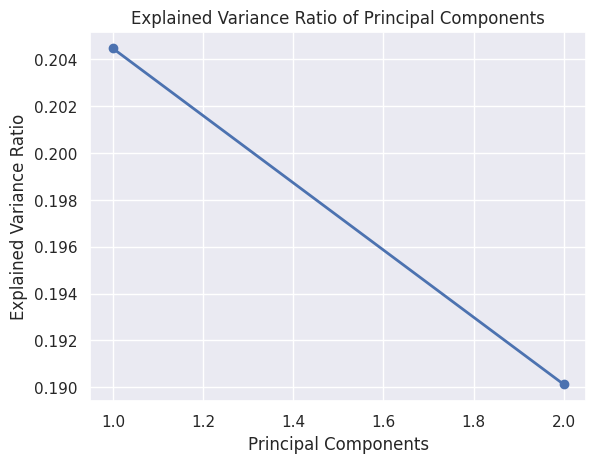

In [16]:
# Explained variance ratio (scree plot)
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
plt.title("Explained Variance Ratio of Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

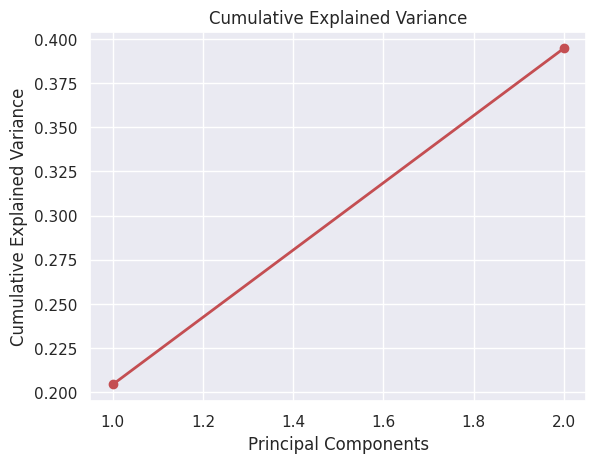

In [17]:
# Cumulative explained variance
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 'ro-', linewidth=2)
plt.title("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [18]:
!pip show pycaret
!pip show scikit-learn

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 
Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, category-encoders, fastai, imbalanced-lea

In [19]:
!pip install --upgrade pycaret


In [20]:
# Initialize PyCaret for classification
from pycaret.classification import *


In [21]:
# Setting up the PyCaret environment
clf = setup(data=df, target='Survived', train_size=0.7, session_id=123)

# Compare all models available in PyCaret
best_model = compare_models()

# Display the best model based on the comparison
best_model

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8040,0.8677,0.6739,0.7854,0.7220,0.5729,0.5795,1.5180
ridge,Ridge Classifier,0.7528,0.8647,0.4522,0.8257,0.5793,0.4273,0.4679,0.1020
et,Extra Trees Classifier,0.7400,0.7837,0.4774,0.7654,0.5815,0.4088,0.4356,0.2090
nb,Naive Bayes,0.6709,0.7925,0.1761,0.8582,0.2816,0.1808,0.2747,0.2260
knn,K Neighbors Classifier,0.6275,0.5906,0.3690,0.5175,0.4255,0.1654,0.1713,0.3870
lda,Linear Discriminant Analysis,0.6260,0.5382,0.0348,0.0800,0.0485,0.0335,0.0389,0.1510
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0980
rf,Random Forest Classifier,0.6164,0.7890,0.0000,0.0000,0.0000,0.0000,0.0000,0.2490
qda,Quadratic Discriminant Analysis,0.6164,0.5441,0.0000,0.0000,0.0000,0.0000,0.0000,0.1010
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Create Decision Tree Classifier Model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
# Tune hyperparameters of the Decision Tree model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.7302,0.5000,0.9231,0.6486,0.5202,0.5692
1,0.7460,0.6816,0.4167,0.8333,0.5556,0.4043,0.4519
2,0.8095,0.8018,0.5833,0.8750,0.7000,0.5685,0.5936
3,0.8387,0.7280,0.6087,0.9333,0.7368,0.6279,0.6577
4,0.7419,0.6667,0.4167,0.8333,0.5556,0.4010,0.4488
5,0.7903,0.7741,0.5417,0.8667,0.6667,0.5253,0.5562
6,0.7903,0.6661,0.5000,0.9231,0.6486,0.5174,0.5668
7,0.8065,0.7659,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.7419,0.5784,0.4167,0.8333,0.5556,0.4010,0.4488


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
# Evaluate the performance of the tuned Decision Tree model
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
# Create and tune a K Neighbors Classifier
knn = create_model('knn')
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.6400,0.5000,0.5714,0.5333,0.2759,0.2774
1,0.6349,0.5951,0.2917,0.5385,0.3784,0.1511,0.1654
2,0.6667,0.5582,0.3750,0.6000,0.4615,0.2383,0.2522
3,0.6935,0.6628,0.5652,0.5909,0.5778,0.3375,0.3377
4,0.6129,0.5789,0.3333,0.5000,0.4000,0.1308,0.1367
5,0.5968,0.5351,0.2083,0.4545,0.2857,0.0560,0.0643
6,0.6290,0.6135,0.3750,0.5294,0.4390,0.1738,0.1796
7,0.5645,0.4984,0.3750,0.4286,0.4000,0.0606,0.0609
8,0.5968,0.5663,0.2500,0.4615,0.3243,0.0719,0.0787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.6816,0.2500,0.8571,0.3871,0.2597,0.3467
1,0.6508,0.6998,0.1667,0.6667,0.2667,0.1348,0.1909
2,0.6667,0.5374,0.1250,1.0000,0.2222,0.1503,0.2850
3,0.6774,0.6265,0.2174,0.7143,0.3333,0.1938,0.2535
4,0.6290,0.5186,0.0833,0.6667,0.1481,0.0680,0.1294
5,0.6613,0.4803,0.1250,1.0000,0.2222,0.1490,0.2837
6,0.6613,0.6623,0.1667,0.8000,0.2759,0.1643,0.2511
7,0.6452,0.5318,0.1250,0.7500,0.2143,0.1166,0.1957
8,0.6129,0.5976,0.0833,0.5000,0.1429,0.0363,0.0609


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [26]:
# Evaluate the performance of the tuned K Neighbors Classifier
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
# Create and tune Logistic Regression
lr = create_model('lr')
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8462,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.7937,0.7895,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.9048,0.9615,0.7917,0.9500,0.8636,0.7914,0.7992
3,0.8226,0.8941,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.7419,0.8344,0.5000,0.7500,0.6000,0.4206,0.4394
5,0.7581,0.8125,0.6250,0.7143,0.6667,0.4781,0.4807
6,0.8387,0.8904,0.6667,0.8889,0.7619,0.6437,0.6589
7,0.7581,0.8509,0.6667,0.6957,0.6809,0.4862,0.4865
8,0.7097,0.8509,0.5000,0.6667,0.5714,0.3586,0.3671


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8611,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8095,0.8194,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.9524,0.9669,0.9167,0.9565,0.9362,0.8982,0.8987
3,0.8710,0.9041,0.7826,0.8571,0.8182,0.7185,0.7203
4,0.7419,0.8235,0.5000,0.7500,0.6000,0.4206,0.4394
5,0.7742,0.8224,0.7500,0.6923,0.7200,0.5313,0.5325
6,0.7903,0.8476,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8226,0.8750,0.7500,0.7826,0.7660,0.6232,0.6236
8,0.7419,0.8509,0.5833,0.7000,0.6364,0.4389,0.4433


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
# Evaluate the performance of the tuned Logistic Regression model
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
# Create Random Forest Classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8045,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.7714,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.9343,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6290,0.8601,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.7802,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6129,0.7845,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6129,0.6223,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6129,0.8377,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6129,0.6173,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
# Tune the Random Forest Classifier
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7826,0.2083,1.0000,0.3448,0.2457,0.3743
1,0.6508,0.7543,0.0833,1.0000,0.1538,0.1012,0.2308
2,0.6190,0.9455,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6290,0.9114,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6613,0.7412,0.1250,1.0000,0.2222,0.1490,0.2837
5,0.6290,0.8174,0.0417,1.0000,0.0800,0.0506,0.1611
6,0.6290,0.6436,0.0417,1.0000,0.0800,0.0506,0.1611
7,0.6129,0.8575,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7097,0.7330,0.2917,0.8750,0.4375,0.3025,0.3855


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [31]:
# Evaluate the performance of the tuned Random Forest model
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
# If we want to perform PCA with the classification model
clf_pca = setup(data=df, target='Survived', train_size=0.7, session_id=123, normalize=True, pca=True, pca_components=3)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 4)"
5,Transformed train set shape,"(623, 4)"
6,Transformed test set shape,"(268, 4)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


In [33]:
# Show the best model after PCA
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7911,0.8544,0.6322,0.7817,0.6929,0.5396,0.5506,0.2350
ada,Ada Boost Classifier,0.7865,0.8201,0.6197,0.7885,0.6812,0.5275,0.5445,0.3950
xgboost,Extreme Gradient Boosting,0.7800,0.8112,0.5906,0.7850,0.6678,0.5104,0.5257,0.1360
lightgbm,Light Gradient Boosting Machine,0.7768,0.8292,0.5739,0.7941,0.6561,0.5003,0.5205,0.4020
rf,Random Forest Classifier,0.7767,0.8389,0.5779,0.7823,0.6575,0.5006,0.5172,0.6570
dt,Decision Tree Classifier,0.7704,0.7350,0.5821,0.7619,0.6558,0.4900,0.5024,0.1120
gbc,Gradient Boosting Classifier,0.7703,0.8192,0.5654,0.7701,0.6449,0.4849,0.5011,0.7160
knn,K Neighbors Classifier,0.7686,0.8132,0.6491,0.7228,0.6773,0.4996,0.5064,0.1260
lr,Logistic Regression,0.7544,0.8186,0.5783,0.7292,0.6393,0.4588,0.4693,0.1190
ridge,Ridge Classifier,0.7431,0.8161,0.5489,0.7163,0.6159,0.4302,0.4420,0.2700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [34]:
# Tune the best model after PCA
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.8205,0.6667,0.6667,0.6667,0.4615,0.4615
1,0.7778,0.7692,0.6250,0.7500,0.6818,0.5132,0.5183
2,0.8095,0.8921,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.8226,0.8841,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.7581,0.7664,0.5417,0.7647,0.6341,0.4612,0.4765
5,0.7581,0.8065,0.5833,0.7368,0.6512,0.4698,0.4773
6,0.8065,0.8147,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8226,0.8980,0.7500,0.7826,0.7660,0.6232,0.6236
8,0.7742,0.8607,0.6250,0.7500,0.6818,0.5090,0.5141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
# Evaluate the best model with PCA
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
tuned_rf_pca = tune_model(tuned_best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.8205,0.6667,0.6667,0.6667,0.4615,0.4615
1,0.7778,0.7692,0.6250,0.7500,0.6818,0.5132,0.5183
2,0.8095,0.8921,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.8226,0.8841,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.7581,0.7664,0.5417,0.7647,0.6341,0.4612,0.4765
5,0.7581,0.8065,0.5833,0.7368,0.6512,0.4698,0.4773
6,0.8065,0.8147,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8226,0.8980,0.7500,0.7826,0.7660,0.6232,0.6236
8,0.7742,0.8607,0.6250,0.7500,0.6818,0.5090,0.5141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


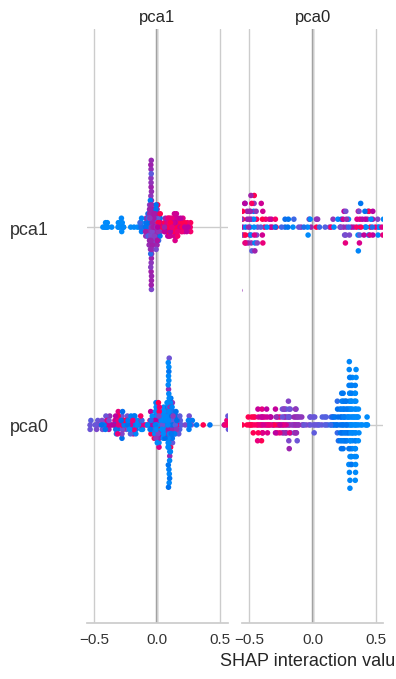

In [37]:
interpret_model(tuned_rf_pca, plot='summary')


In [38]:
# Principal Component Analysis (PCA) - Detailed Scree Plot and Variance Explained
pca = PCA(n_components=9)  # Set n_components to the number of features (9) or fewer
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio (scree plot) - More detailed with grid lines and annotations
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)


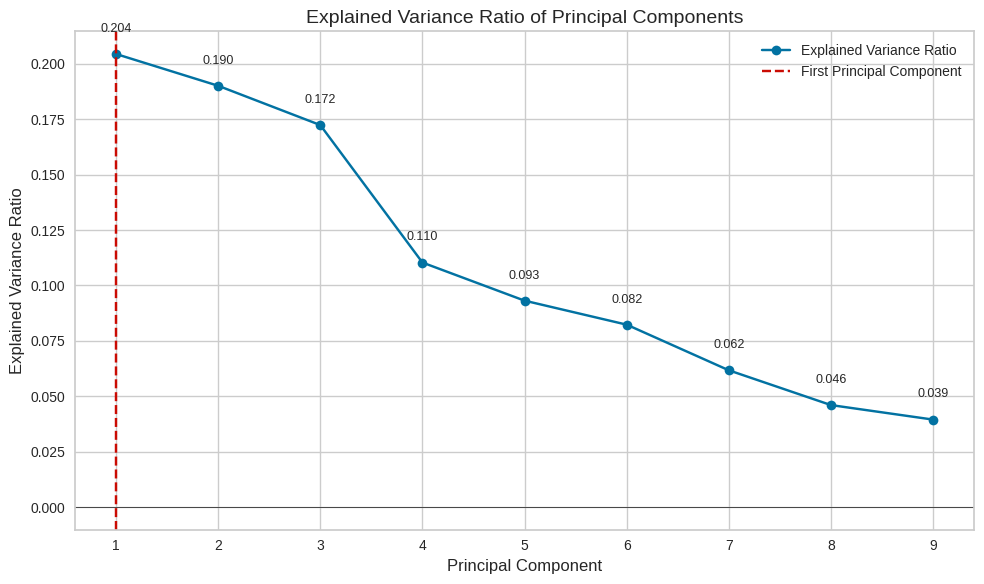

In [39]:

# Plotting the Explained Variance of each Principal Component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.title("Explained Variance Ratio of Principal Components", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))  # Label each component
plt.grid(True)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=1, color='r', linestyle='--', label='First Principal Component')
for i, var in enumerate(explained_variance):
    plt.text(i + 1, var + 0.01, f'{var:.3f}', ha='center', fontsize=9)  # Annotate each point with the variance value
plt.legend()
plt.tight_layout()
plt.show()


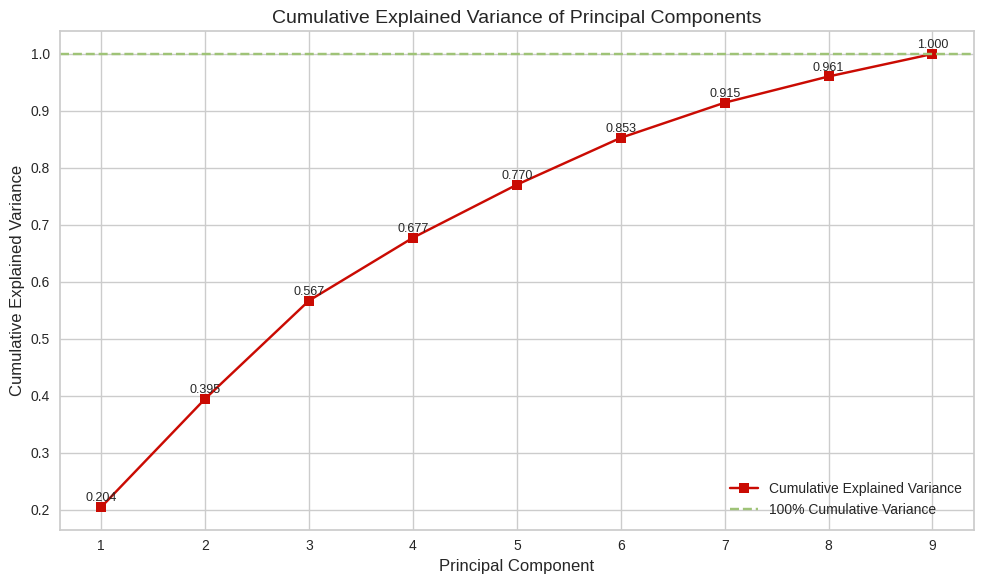

In [40]:

# Plotting the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='s', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.title("Cumulative Explained Variance of Principal Components", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))  # Label each component
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='100% Cumulative Variance')
for i, var in enumerate(cumulative_explained_variance):
    plt.text(i + 1, var + 0.01, f'{var:.3f}', ha='center', fontsize=9)  # Annotate each point with cumulative variance
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
# Create and tune SVM model
svm = create_model('svm')
tuned_svm = tune_model(svm)
# Evaluate the performance of the tuned SVM model
evaluate_model(tuned_svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6349,0.6731,0.4583,0.5238,0.4889,0.2069,0.2080
1,0.7619,0.8002,0.5833,0.7368,0.6512,0.4741,0.4816
2,0.7937,0.8718,0.7083,0.7391,0.7234,0.5590,0.5593
3,0.8387,0.8540,0.7826,0.7826,0.7826,0.6544,0.6544
4,0.7742,0.7939,0.5417,0.8125,0.6500,0.4930,0.5151
5,0.6613,0.7489,0.4167,0.5882,0.4878,0.2457,0.2538
6,0.7258,0.7632,0.5000,0.7059,0.5854,0.3893,0.4023
7,0.7097,0.7796,0.4583,0.6875,0.5500,0.3481,0.3637
8,0.7419,0.8454,0.5417,0.7222,0.6190,0.4299,0.4401


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7949,0.6667,0.5517,0.6038,0.3205,0.3248
1,0.7302,0.7361,0.6667,0.6400,0.6531,0.4324,0.4327
2,0.7143,0.8120,0.6667,0.6154,0.6400,0.4038,0.4047
3,0.8387,0.8829,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.7419,0.7281,0.5833,0.7000,0.6364,0.4389,0.4433
5,0.7258,0.8048,0.5000,0.7059,0.5854,0.3893,0.4023
6,0.7903,0.7895,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.7903,0.8443,0.8333,0.6897,0.7547,0.5744,0.5823
8,0.7903,0.8553,0.6667,0.7619,0.7111,0.5477,0.5507


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

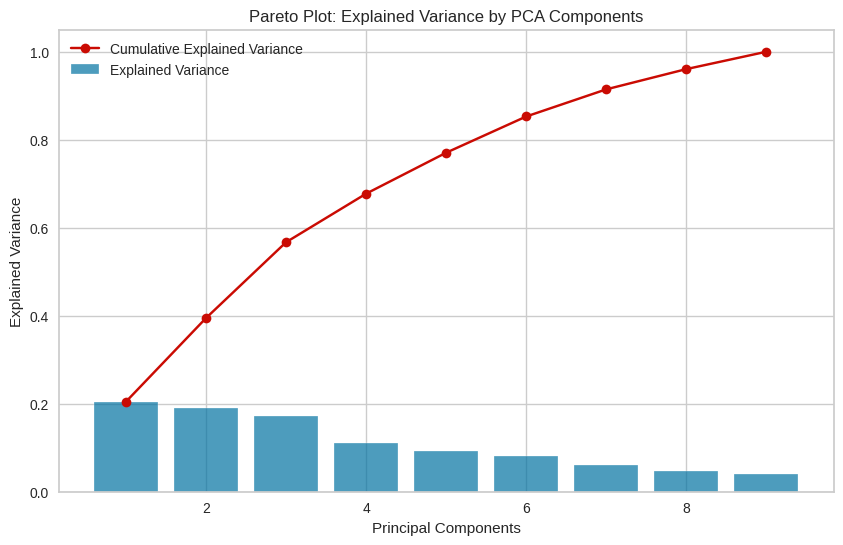

<Figure size 1200x600 with 0 Axes>

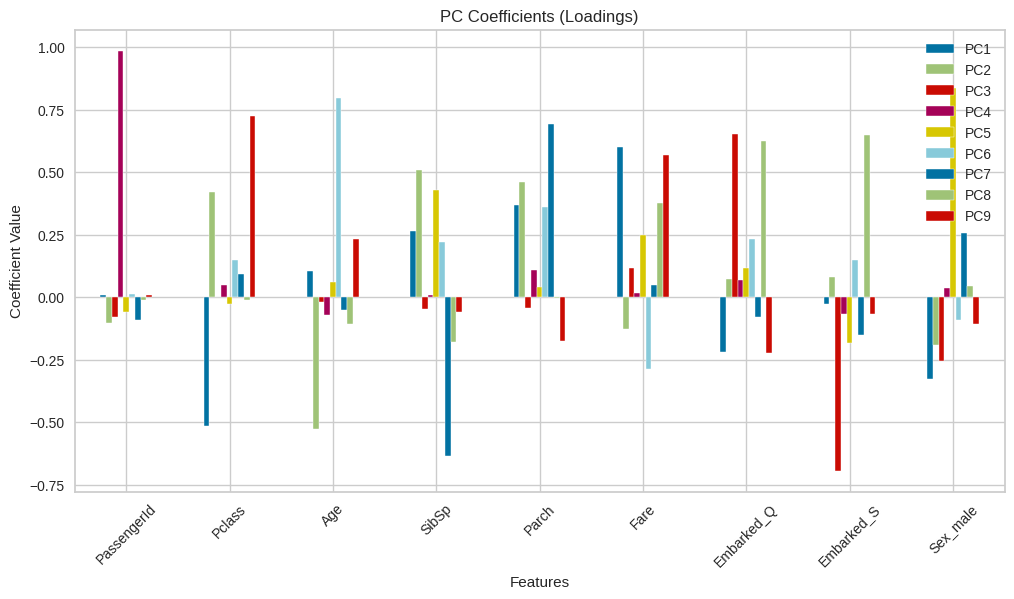

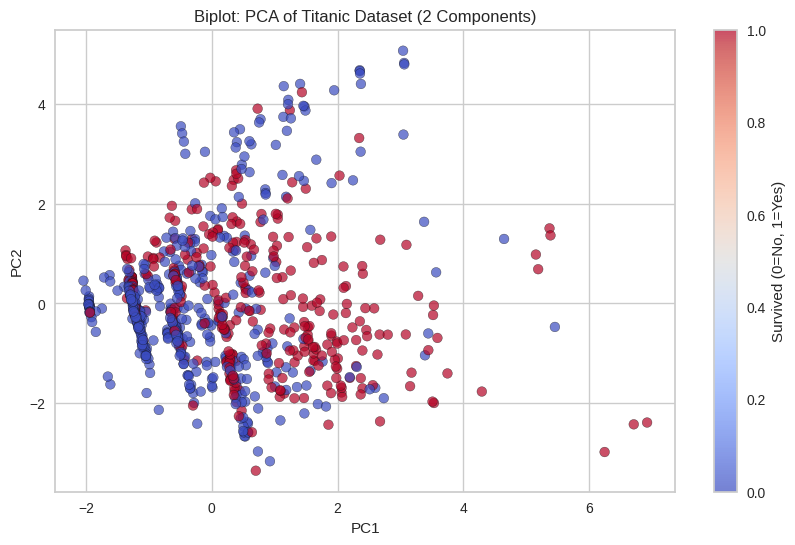

Scaled dataset (first 10 rows):
   PassengerId    Pclass       Age     SibSp     Parch      Fare  Embarked_Q  \
0    -1.730108  0.827377 -0.565736  0.432793 -0.473674 -0.502445   -0.307562   
1    -1.726220 -1.566107  0.663861  0.432793 -0.473674  0.786845   -0.307562   
2    -1.722332  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   -0.307562   
3    -1.718444 -1.566107  0.433312  0.432793 -0.473674  0.420730   -0.307562   
4    -1.714556  0.827377  0.433312 -0.474545 -0.473674 -0.486337   -0.307562   
5    -1.710669  0.827377 -0.104637 -0.474545 -0.473674 -0.478116    3.251373   
6    -1.706781 -1.566107  1.893459 -0.474545 -0.473674  0.395814   -0.307562   
7    -1.702893  0.827377 -2.102733  2.247470  0.767630 -0.224083   -0.307562   
8    -1.699005  0.827377 -0.181487 -0.474545  2.008933 -0.424256   -0.307562   
9    -1.695117 -0.369365 -1.180535  0.432793 -0.473674 -0.042956   -0.307562   

   Embarked_S  Sex_male  
0    0.615838  0.737695  
1   -1.623803 -1.355574  
2    0.61

In [42]:
# 1. Pareto Plot (Explained Variance by PCA components)
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the Pareto chart
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='b', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance, color='r', marker='o', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Pareto Plot: Explained Variance by PCA Components')
plt.legend()
plt.show()

# 2. PC Coefficient Plot (Loadings for each PC)
components = pca.components_

# Create a DataFrame for easier viewing
pc_df = pd.DataFrame(components.T, columns=[f"PC{i+1}" for i in range(components.shape[0])], index=X.columns)

# Plot the coefficients (loadings) for each principal component
plt.figure(figsize=(12,6))
pc_df.plot(kind='bar', figsize=(12, 6))
plt.title('PC Coefficients (Loadings)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# 3. Biplot (PCA projections on the first two components)
# First, apply PCA to reduce the dimensions to 2
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a scatter plot with the first two PCA components
plt.figure(figsize=(10,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Survived (0=No, 1=Yes)')
plt.title('Biplot: PCA of Titanic Dataset (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 4. Dataset in Matrix Form (scaled features)
# Display the scaled dataset in matrix form (first 10 rows as an example)
print("Scaled dataset (first 10 rows):")
print(X_scaled[:10])


Eigenvalues: [1.89891527 1.75286796]
Eigenvectors: 
[[ 0.20794612  0.59825884 -0.57365262  0.09041435  0.19470703 -0.31188555
   0.02920636 -0.35433919]
 [-0.51868178  0.04053756  0.25812429  0.55515188  0.52277971 -0.26998727
   0.08893972  0.02005347]]
Explained Variance Ratio: [0.23703197 0.21880162]


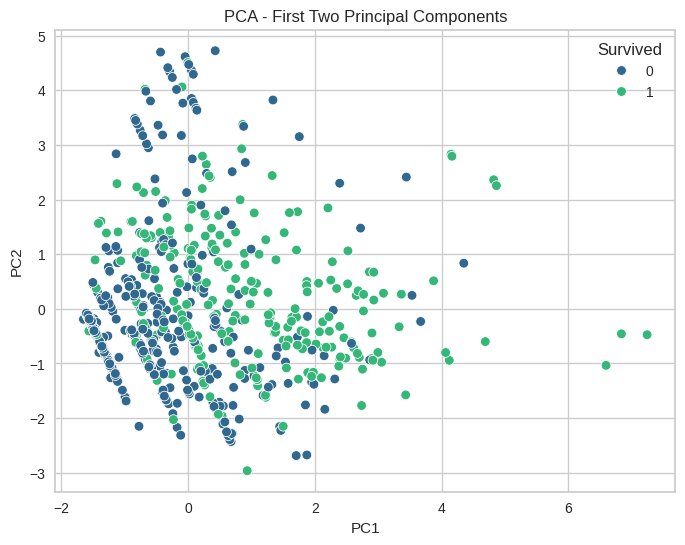

In [43]:
# Continue from your previous imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# For simplicity, let's drop rows with missing values (you can fill or impute as needed)
df = df.dropna(subset=['Age', 'Fare'])  # Drop rows where Age or Fare is missing
df = pd.get_dummies(df, drop_first=True)  # Convert categorical columns to numerical (dummy variables)

# Features for PCA - you can choose the columns that make sense for PCA
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Scaling the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Applying PCA
pca = PCA(n_components=2)  # We are interested in the first two components (PC1, PC2)
principal_components = pca.fit_transform(df_scaled)

# Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Calculate the variance explained by the principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable (Survived) for visualization
pc_df['Survived'] = df['Survived'].values

# Display the explained variance ratio and eigenvectors
print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors: \n{eigenvectors}")
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Survived', palette='viridis')
plt.title('PCA - First Two Principal Components')
plt.show()


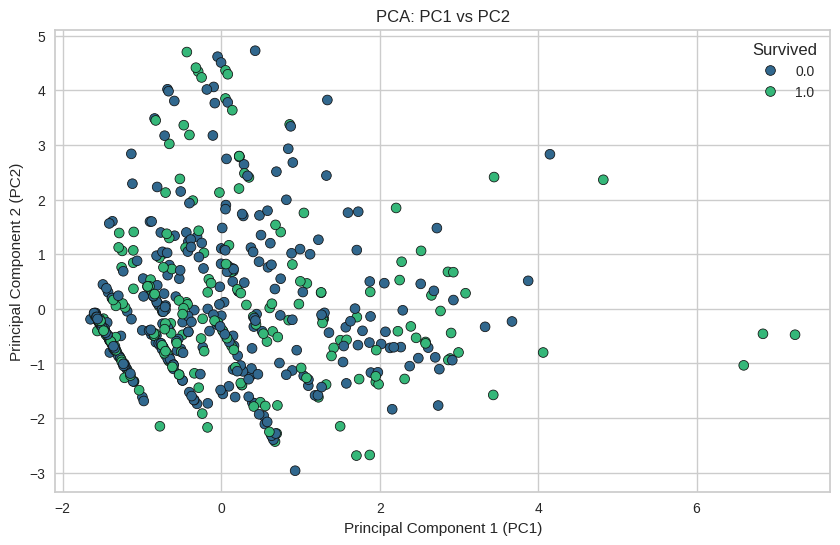

Eigenvalues (Variance) for each principal component: [1.89891527 1.75286796]
Explained Variance Ratio for each principal component: [0.23703197 0.21880162]
Eigenvectors (Components of each principal axis):
[[ 0.20794612  0.59825884 -0.57365262  0.09041435  0.19470703 -0.31188555
   0.02920636 -0.35433919]
 [-0.51868178  0.04053756  0.25812429  0.55515188  0.52277971 -0.26998727
   0.08893972  0.02005347]]
Total explained variance by PC1 and PC2: 45.58%


In [44]:
# Continue from the previous PCA result

# principal_components contains the projections of the data onto the first two principal components (PC1 and PC2)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable (Survived) back to the DataFrame for later analysis
pc_df['Survived'] = df['Survived']

# Visualize the first two principal components (PC1 vs PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Survived', data=pc_df, palette="viridis", edgecolor='k')
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Survived')
plt.show()

# Print the eigenvalues (variance) and the explained variance ratio for each principal component
print("Eigenvalues (Variance) for each principal component:", eigenvalues)
print("Explained Variance Ratio for each principal component:", explained_variance_ratio)

# Print the eigenvectors (the direction of each principal component)
print("Eigenvectors (Components of each principal axis):")
print(eigenvectors)

# You can also check how much variance is explained by PC1 and PC2
explained_variance = explained_variance_ratio.sum()
print(f"Total explained variance by PC1 and PC2: {explained_variance * 100:.2f}%")
